In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc, rcParams

import seaborn as sns

In [3]:
project_path = os.path.join(os.getenv('HOME'), "Desktop", "ml-ribo-predict")
data_path = os.path.join(project_path, "Data")
#---------------------
phylo_total_path = os.path.join(data_path, "Phylo_counts")
phylo_train_path = os.path.join(data_path, "Train_Test_Dataset", "train")
phylo_test_path = os.path.join(data_path, "Train_Test_Dataset", "test")

## Mut_12 Data
___

In [4]:
file_12 = os.path.join(data_path, "mut12_data.csv")

In [5]:
mut_12 = pd.read_csv(file_12)
list(mut_12.columns)

['sequences', 'total_cnt_rate', 'number_mutations']

In [6]:
mut_1 = mut_12[mut_12['number_mutations'] <= 1]

In [7]:
mut_2 = mut_12[mut_12['number_mutations'] == 2]

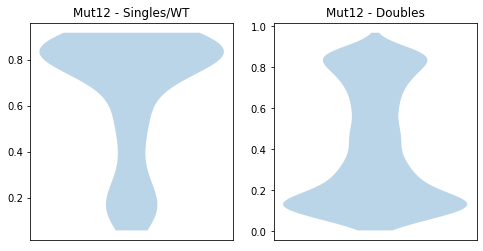

In [8]:
f1, a1 = plt.subplots(ncols=2, figsize=(8,4))
a1[0].violinplot(mut_1['total_cnt_rate'], showextrema=False)
a1[0].set_title('Mut12 - Singles/WT')
a1[0].get_xaxis().set_visible(False)
a1[1].violinplot(mut_2['total_cnt_rate'], showextrema=False)
a1[1].set_title('Mut12 - Doubles')
a1[1].get_xaxis().set_visible(False)


Text(0.5, 1.0, 'Mut12 - Doubles')

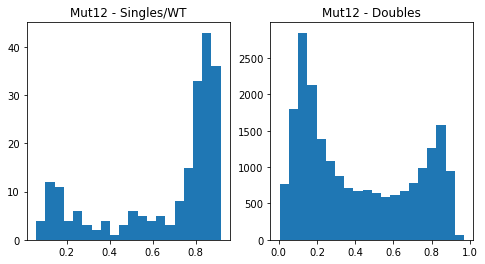

In [9]:
f2, a2 = plt.subplots(ncols=2, figsize=(8,4))
a2[0].hist(mut_1['total_cnt_rate'], bins=20)
a2[0].set_title('Mut12 - Singles/WT')
a2[1].hist(mut_2['total_cnt_rate'], bins=20)
a2[1].set_title('Mut12 - Doubles')

## Train, Test Data Distributions
___

In [10]:
phylo_total_files = os.listdir(phylo_total_path)
total_list = [item for item in phylo_total_files if 'phylo_mut' in item]

phylo_test_files = os.listdir(phylo_test_path)
test_list = [item for item in phylo_test_files if '_test' in item]

phylo_train_files = os.listdir(phylo_train_path)
train_list = [item for item in phylo_train_files if '_train' in item]

In [11]:
toDict = {}
trDict = {}
teDict = {}
for i,d in enumerate(total_list):
    file = os.path.join(phylo_total_path,d)
    df = pd.read_csv(file)
    pos = int(d.split("phylo_mut")[1].split(".csv")[0])
    
    if pos == 1:
        toDict[pos] = np.concatenate((df['rate_all'].to_numpy(), mut_1['total_cnt_rate'].to_numpy()),axis=0)
    elif pos == 2:
        toDict[pos] = np.concatenate((df['rate_all'].to_numpy(), mut_2['total_cnt_rate'].to_numpy()),axis=0)
    else:
        toDict[pos] = df['rate_all'].to_numpy()

for i,d in enumerate(test_list):
    file = os.path.join(phylo_test_path,d)
    df = pd.read_csv(file)
    pos = int(d.split("_test")[0])
    teDict[pos] = df['label'].to_numpy()

for i,d in enumerate(train_list):
    file = os.path.join(phylo_train_path,d)
    df = pd.read_csv(file)
    pos = int(d.split("_train")[0])
    trDict[pos] = df['label'].to_numpy()

In [12]:
sns.set_theme()
sns.set_context("paper")

In [13]:
def printgraphs(d1,d2,typ):
    col,row = 3,4
    f = plt.figure(figsize=(col*4,row*4), dpi = 120)
    gs = gridspec.GridSpec(row,col, hspace=0.4, wspace=0.4, figure = f)
    pos = 3
    rc('font', weight='bold')
    
    for i in range(0,row):
        for j in range(0,col):
            
            num = (col*i+1)+(j)
            
            if num < 11:
                data1 = d1[pos]
                data2 = d2[pos]

                a = f.add_subplot(gs[i,j])
                a.set_title(f'Mutations {pos}',fontsize = 14, fontweight = 'bold')

                if typ == "violin":
                    a.violinplot(data1, showmeans=True, showextrema=False)
                    a.violinplot(data2, showmeans=True, showextrema=False) 
                    a.get_xaxis().set_visible(False)
                    a.set_ylim([0,1])
                    a.set_ylabel("Fraction Cleaved", fontsize = 12, fontweight = 'bold')
                    a.tick_params(axis='both', which='major', labelsize=11)

                pos += 1
            
        f.suptitle('Data Distributions', y=0.925, fontsize = 16, fontweight = 'bold')
    


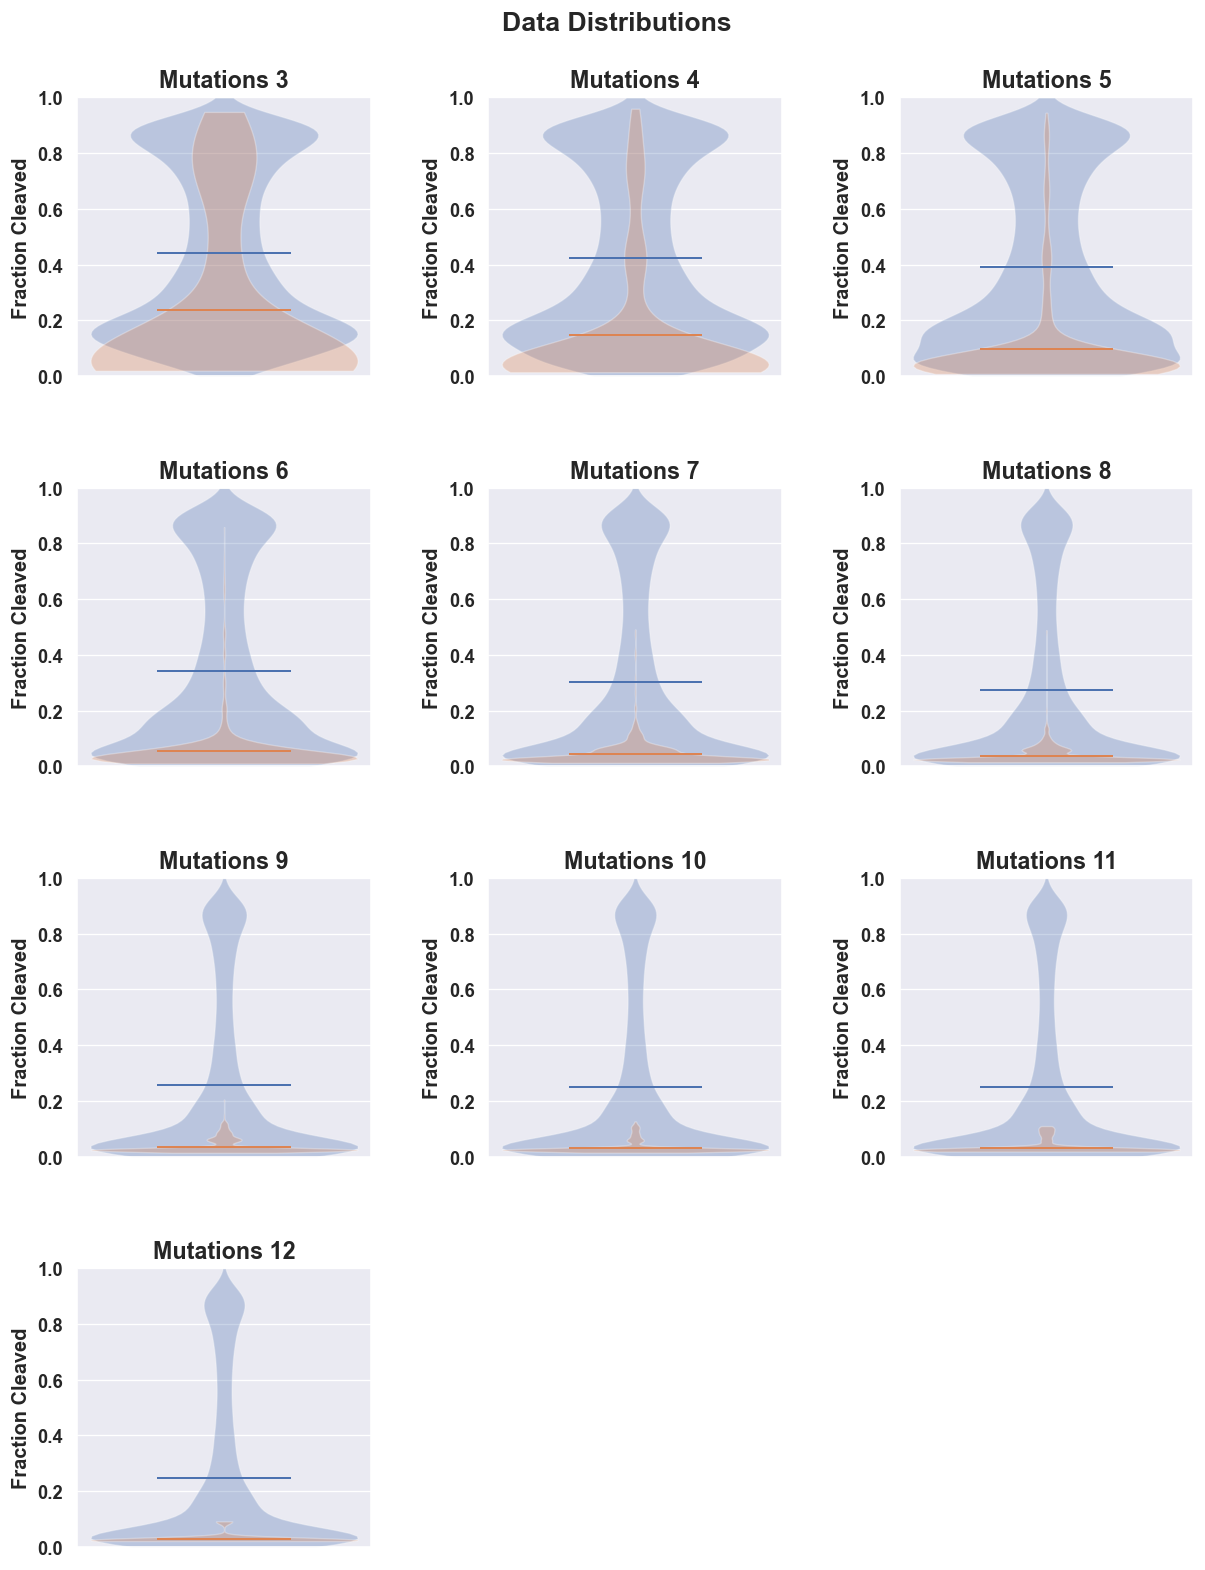

In [14]:
printgraphs(trDict,teDict, "violin")

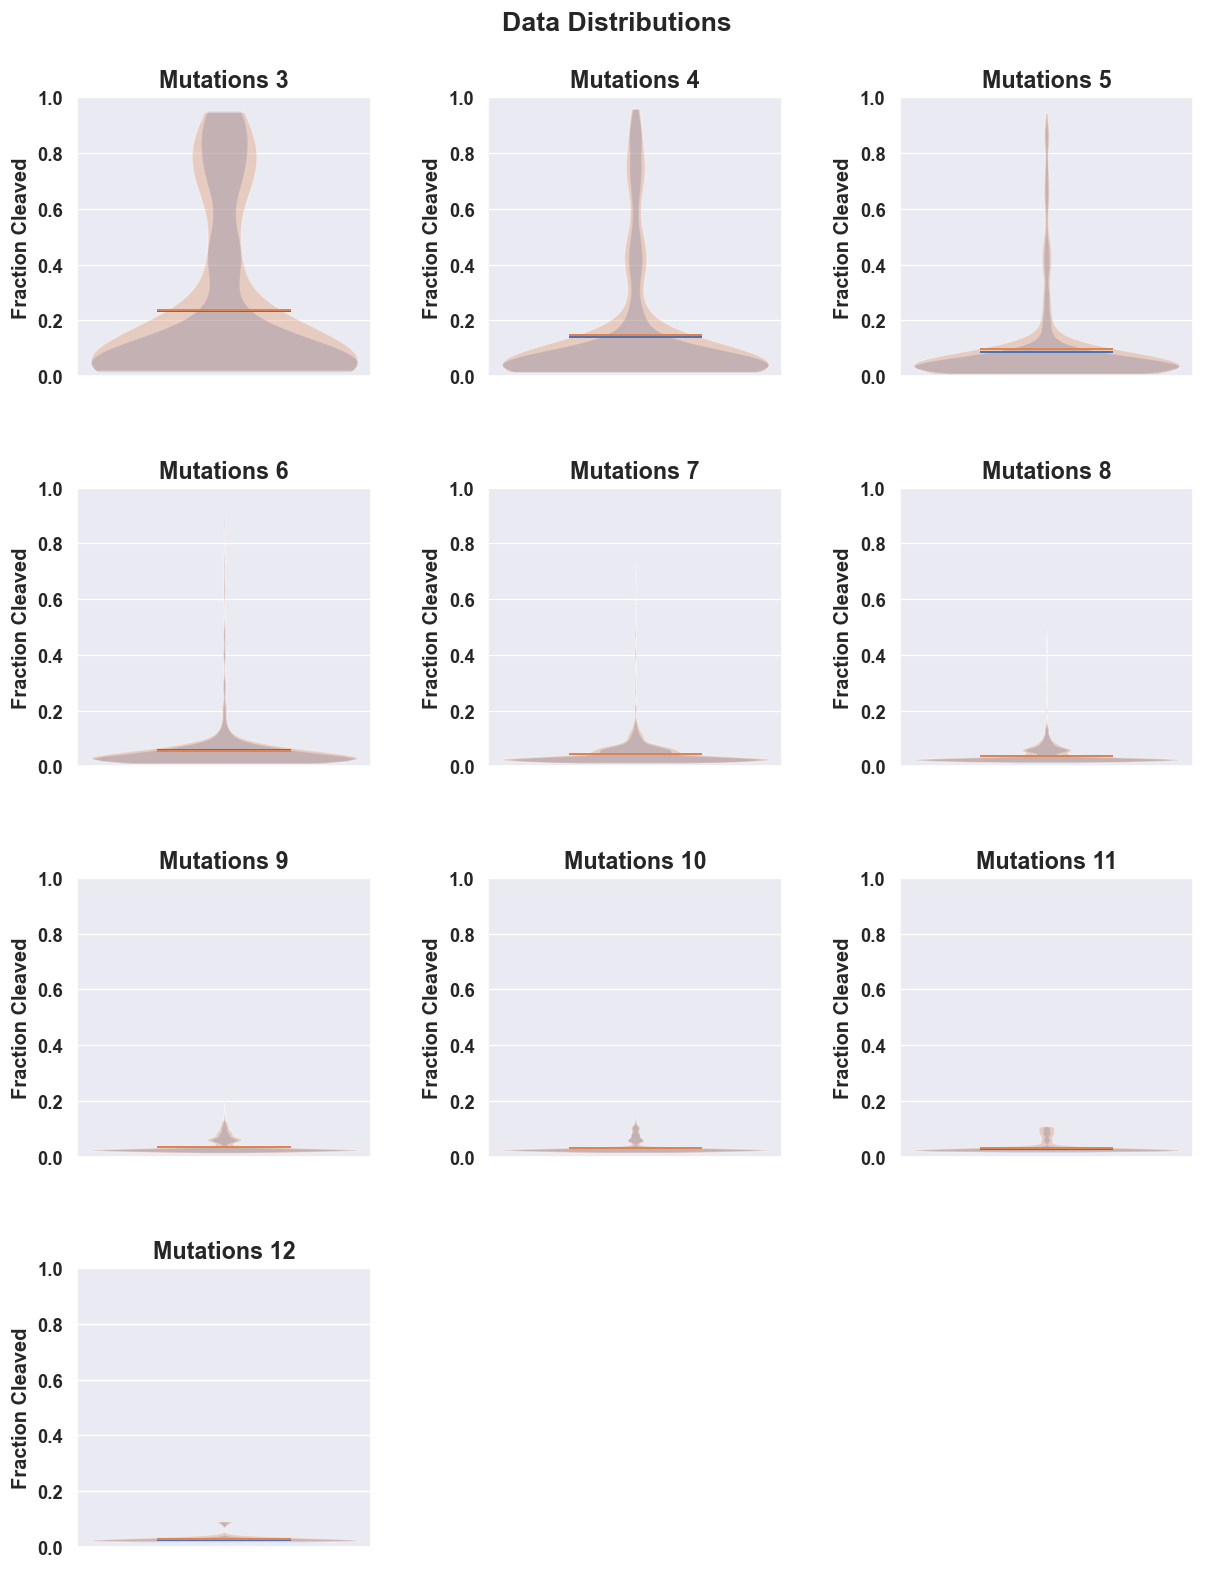

In [15]:
printgraphs(toDict,teDict, "violin")